Background
E-commerce companies like amazon,flipcart uses different recommendation system to provide suggestions to the customers.amazon
uses currently 'item-item collaborative filtering'(User based recommenadtion system),which scales to massive datasets and products high quality
recommendation system in real time.This system is a kind of information filtering systemwhich seeks to predict the 'rating' or preferences
which user interested in

A recommendation engine is a system or algorithm that analyze user data and provides personalized suggestion
or recommendation for items or content that the user may be interested in.
These recommendations are based on various factors such as the 'user preferences','historical behavior','demographic information',and 'similarities to other user'

Recommendation engines are commonly used in e-commerce,OTT,scoial media platform and othe online services to enhance user experience and engagement..
They help users discovernew products,movies,music,articles,or any other items that align with their interests...
recommender system creates a similarity b/n user and item , expolits the similarity b/n user/item to make recommendations.

Types of recommendations?
mainly 6 types of recommendation system
1.popularity based systems -> it worksby recommending items viwed and purchased by most people and purchased by most people and are rated high...it is not personalized recommendation

2.classification model based -> it works by understanding the features of the user and applying the classification algorithm to dicide whether the user is interested or  ot in product

3.content based recommendation -> it is based on the information on the contents of item rather than on the user opinions.

4.Collaberative filtering -> it is based on assumption that people like things similar to other things they like,and things that are liked by other people with similar taste.
  a) User-User
  b) Item-Item

5.Hybrid Approaches -> this system approach is to  combine collaberative filtering , content based filtering ....and other approaches discussed above..

6.Association rule mining ->it captures the relationship b/n item based on their patterns of co-occurence accross transaction..

In [1]:
#i have not considered complete 7 million data bcz my m/c can't afford it.....do it later bro..

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
import os
import importlib
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)


In [2]:
df = pd.read_csv(r"D:\PROJECTS\amazon_recommendation_engine\ratings_Electronics.csv",names=['userId','ProductId','rating','timestamp'])

In [3]:
df.shape
#7 million data points/rows

(7824482, 4)

In [4]:
df.head()

,userId,ProductId,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [5]:
#Since dataset is too big,thats why i am randomly taking 20% of data as sample -> which is 20/100 * (7824482) => 1564896

In [6]:
sample_data = df.sample(n=1564896, ignore_index=True)

In [7]:
sample_data.shape

(1564896, 4)

In [8]:
sample_data.head()

,userId,ProductId,rating,timestamp
0,A1CJ9WZFMPLSNK,B00FX9WJNO,5.0,1402272000
1,A3JD3GQOKIFZ1D,B003Q68RS2,4.0,1367107200
2,A1K21OPFQTFIM7,B003MXJ0QW,5.0,1351468800
3,AQBI6F6RMPOP4,B00CO8TBOW,5.0,1399075200
4,A3I7N4YJPT631V,B0028N6VLE,4.0,1267574400


In [9]:
del df # to release the memory occupied by df

In [10]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564896 entries, 0 to 1564895
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1564896 non-null  object 
 1   ProductId  1564896 non-null  object 
 2   rating     1564896 non-null  float64
 3   timestamp  1564896 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 47.8+ MB


In [11]:
#we dont need timestamp
sample_data.drop(columns=['timestamp'],inplace=True)

In [12]:
sample_data.describe()
#25% of rating are less than 3
#minimum rating on product is 1 , maximum rating is 5 and avg rating is around 4

,rating
count,1.564896e+06
mean,4.013170e+00
std,1.381009e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [13]:
sample_data.duplicated().sum() #No duplicate rows....(but there are duplicated UserId and ProductId)
#(bcz many to mant relationship b/n user and products..)
#UserId and ProductId together form Primary Key (PK)

0

# sample_data analysis

Text(0, 0.5, 'Count')

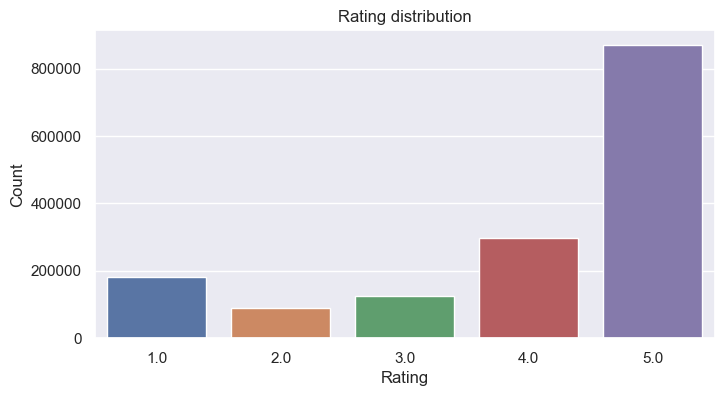

In [14]:
plt.figure(figsize=(8,4))
sns.countplot(x='rating',data=sample_data)
plt.title('Rating distribution')
plt.xlabel('Rating')
plt.ylabel('Count')

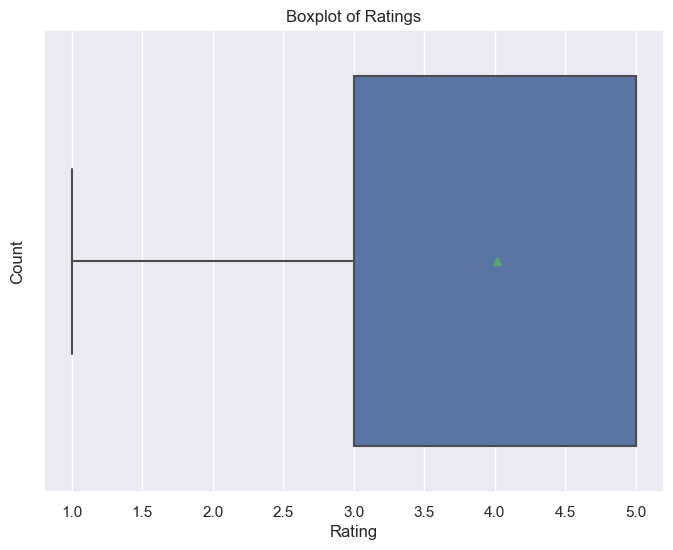

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='rating', data=sample_data,showmeans=True)
plt.title('Boxplot of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [16]:
#total no of unique products in sample_data
sample_data['ProductId'].unique().shape[0]

237912

#Analyzing the rating by user

In [17]:
#Analyzing the rating by user
no_of_rated_products_per_user = sample_data.groupby(by='userId')['rating'].count().sort_values(ascending=False) #pandas series,,,same as sql query 9group by clause)
no_of_rated_products_per_user.head()
#as u see ADLVFFE4VBT8 USER has given more reviews in sample_data..
#ie;he has given 107 times rate in total..(Not given 107 rate to single product..LOL)
#OR we can say he has given ratings for 107 products in total..

userId
A5JLAU2ARJ0BO     110
A3OXHLG6DIBRW8    107
ADLVFFE4VBT8      101
A680RUE1FDO8B     100
A6FIAB28IS79       86
Name: rating, dtype: int64

In [18]:
print('No of Users who has given ratings more than 50 in total:{}'.format(sum(no_of_rated_products_per_user >= 50)))

No of Users who has given ratings more than 50 in total:26


In [19]:
no_of_rated_products_per_user.head(30)

userId
A5JLAU2ARJ0BO     110
A3OXHLG6DIBRW8    107
ADLVFFE4VBT8      101
A680RUE1FDO8B     100
A6FIAB28IS79       86
A1ODOGXEYECQQ8     72
A36K2N527TXXJN     70
AWPODHOB4GFWL      65
A3EXWV8FNSSFL6     63
A17BUUBOU0598B     62
A1X1CEGHTHMBL1     60
A3LGT6UZL99IW1     60
A22CW0ZHY3NJH8     58
A23GFTVIETX7DS     58
ARBKYIVNYWK3C      55
A1UQBFCERIP7VJ     55
A38RMU1Y5TDP9      54
A1J75JJ0Q2OEJN     54
AEJAGHLC675A7      54
A1T1YSCDW0PD25     52
A2AY4YUOX2N1BQ     51
A203OCQQ12MAVT     51
A31N0XY2UTB25C     50
A2NOW4U7W3F7RI     50
A25C2M3QF9G7OQ     50
A3AYSYSLHU26U9     50
AQIJ3ZEEVCIKU      48
A19W47CXJJP1MI     48
A3NHUQ33CFH3VM     48
A3T7V207KRDE2O     48
Name: rating, dtype: int64

In [20]:
# as u see only 26 products are there in sample_data which has get the more than 50 rate

Popularity based Recommendation

For example , if any product which is usually  brought by every new user than there are chances that it will suggest that item to the user who just signed up

the problem with popularity based recommendation system is that personalization is not available with this method...even though you know the behavior of the user but you can't recommend items accordingly

In [21]:
#products which had got  more than 50 reviews
data = sample_data.groupby('ProductId').filter(lambda x:x['rating'].count() >= 50)
data

,userId,ProductId,rating
3,AQBI6F6RMPOP4,B00CO8TBOW,5.0
5,A1EI9ZDGWNW9IR,B003JD6LVW,1.0
7,A2ZHWRBQ8O3L3I,B001GTT0VO,3.0
8,A2C57VMBSDKO8M,B005CT56F8,4.0
9,A3EBYB4OJSYL5M,B005ES0YYA,5.0
...,...,...,...
1564884,A1QFNFM3VXCIH1,B003NR57BY,5.0
1564887,A13H8I9FHQTIDH,B0009RGLSE,5.0
1564888,A2D333TODX15EN,B006JH8T3S,5.0
1564891,A3BXSUNEVAFAGF,B000NMFCIA,5.0


In [22]:
no_of_ratings_per_product = data.groupby('ProductId')['rating'].count().sort_values(ascending=False)

In [23]:
no_of_ratings_per_product #pandas series..

ProductId
B0074BW614    3654
B00DR0PDNE    3373
B007WTAJTO    2902
B006GWO5WK    2506
B0019EHU8G    2495
              ... 
B001UE6N6A      50
B0077V88VI      50
B000UY1OMY      50
B0011ZK6OS      50
B00378YPB2      50
Name: rating, Length: 4780, dtype: int64

as u see B0074BW614 this product had got 3582 ratings in total..thus you can conclude that this product has gained more popularity  so u can recommend it 'new user'..thus now our s/wbecome popularity based recommendation system

#TOP 10 products which had gained more popularity

Text(0.5, 1.0, 'top 10 records')

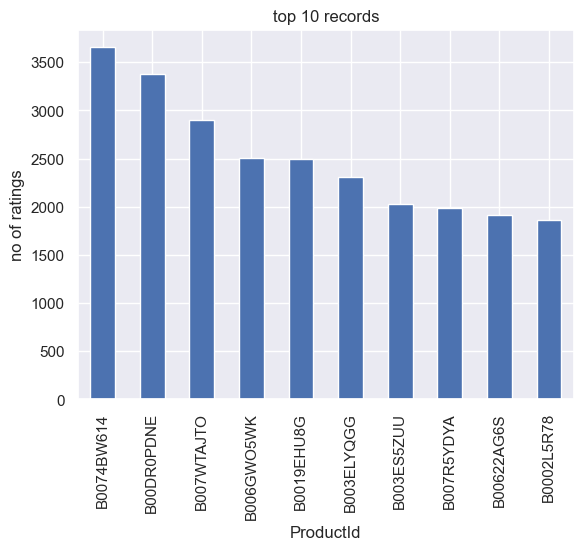

In [24]:
no_of_ratings_per_product.head(10).plot(kind='bar')
plt.xlabel('ProductId')
plt.ylabel('no of ratings')
plt.title('top 10 records')

In [25]:
#Avg rating per product
avg_rating_per_product = pd.DataFrame(data.groupby('ProductId')['rating'].mean())
avg_rating_per_product

,rating
ProductId,
0972683275,4.528926
1400501466,3.666667
1400532655,3.622222
140053271X,3.700000
1400599997,3.540000
...,...
B00I94IPTW,3.859375
B00IF0JAYE,3.760000
B00INNP5VU,3.945274


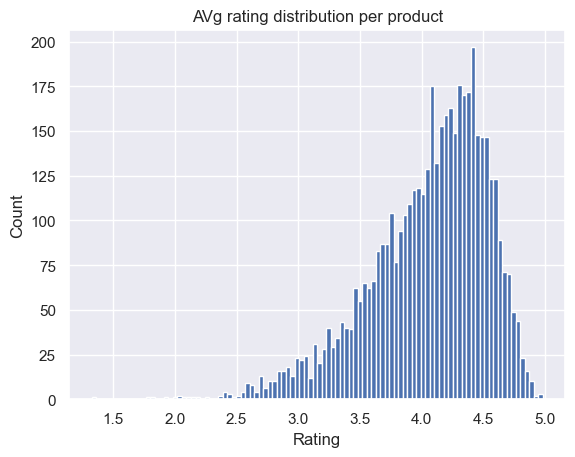

In [26]:
plt.hist(avg_rating_per_product['rating'],bins=100)
plt.title('AVg rating distribution per product')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

#3.8 - 4.8  is most of the rating

In [27]:
#checking the skewness of the mean rating data
avg_rating_per_product['rating'].skew()

-0.9445428671317715

In [28]:
#as u see it is highly negative... OR we can say LEFT skewed distribution...

In [29]:
avg_rating_per_product['rating_counts'] = pd.DataFrame(data.groupby('ProductId')['rating'].count())
avg_rating_per_product

,rating,rating_counts
ProductId,,
0972683275,4.528926,242
1400501466,3.666667,54
1400532655,3.622222,90
140053271X,3.700000,90
1400599997,3.540000,50
...,...,...
B00I94IPTW,3.859375,64
B00IF0JAYE,3.760000,50
B00INNP5VU,3.945274,201


In [30]:
#highest avg rating product
avg_rating_per_product[avg_rating_per_product['rating'] == avg_rating_per_product['rating'].max()]

,rating,rating_counts
ProductId,,
B004NPH7BI,4.981818,55


In [31]:
#highest no of rating_counts got product
avg_rating_per_product[avg_rating_per_product['rating_counts'] == avg_rating_per_product['rating_counts'].max()]

,rating,rating_counts
ProductId,,
B0074BW614,4.499453,3654


In [32]:
#correlation b/n rating and rating_counts
print(avg_rating_per_product['rating'].corr(avg_rating_per_product['rating_counts']))
#weak correlation....ie;barely related,,,or less related

0.11360867138662482


# 1) Collaberative Filtering(CF)(Item-Item)

These technique aim to fill in the missing enteries of user-item association matrix....we are using CF approaches.
CF is based on the idea that the best recommendation come from people who have similar tastes...in other words,it uses historical item ratings of like-minded people to predict how someone would rate an item..

2)model based approach -> for ex we would use existing user item interaction to train model to predict the top5 items that user may like the most..

In [3]:
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df = pd.read_csv(r"D:\PROJECTS\amazon_recommendation_engine\ratings_Electronics.csv",names=['userId','ProductId','rating','timestamp'])
df.drop(columns=['timestamp'],inplace=True)
df = df.iloc[:10000,:]

In [4]:
# df = df.iloc[:10000,:]#bcz my system cant handle 7 million (above i have considered 1564896 row samples ) of data at once and ot is giving error while executing #Create user-item matrix
# # user_item_matrix = df.pivot_table(index='userId',columns='ProductId',values='rating').fillna(0) this line so iave reduced the size of dataset
# #so i have cosidered only 10k rows data out of 7 million data points/rows..

# #selecting first 10k rows for further operation..

In [4]:
df['userId'].duplicated().sum()#ie; productId and userID together forms a Primary key of the table/dataset..
#VVVVVVVVVVVIIIIIMPPPPPPPPPP
#bcz userId and productID repeating ,,but in combine they are unique..
#ie;any user can give rate to any no of (may be ALL) products,,but any user cant give rate 2 times on any of the single products..thats why we are saying userId and productID together forms a primary key of above dataset..
#thats why there are duplicates in userId ,,ie;single user has given ratings for more than 1 products..

174

In [5]:
df['ProductId'].duplicated().sum()
#in 10k sample of rows there are repated product..bcz more than 1 user has given a rating to same products

8695

In [6]:
df[['userId','ProductId']].duplicated().sum()

0

In [7]:
#see both together doesnt have any duplicates,,thus it is obeying PK rule......

so we can conclude that,,after selecting 10000 rows from dataset for user-item matrix we are not getting (UserId)10000x10000(productId),,bcz useriD and productID are repeatinf.......thats why we got  (userID)9826 rows × (ProductID)1305 columns


In [8]:
rating_matrix = df.pivot_table(index='userId',columns='ProductId',values='rating').fillna(0)
rating_matrix.head()#user_user_rating_matrix

ProductId,0132793040,0321732944,0439886341,0511189877,0528881469,0558835155,059400232X,0594012015,0594017343,0594017580,...,B00000J1DN,B00000J1DT,B00000J1E6,B00000J1EC,B00000J1EJ,B00000J1EP,B00000J1EQ,B00000J1ES,B00000J1EZ,B00000J1F3
userId,,,,,,,,,,,,,,,,,,,,,
A00766851QZZUBOVF4JFT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A01255851ZO1U93P8RKGE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0293130VTX2ZXA70JQS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A030530627MK66BD8V4LN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0402564TCEO67AUZFJO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
rating_matrix.shape

(9826, 1305)

In [10]:
#BCZ we are doing item-item based collaberative recommendation system,,,we have to make productId as index and userId as columns...so make transpose
item_item_rating_matrix = rating_matrix.T
item_item_rating_matrix.head()

userId,A00766851QZZUBOVF4JFT,A01255851ZO1U93P8RKGE,A0293130VTX2ZXA70JQS,A030530627MK66BD8V4LN,A0402564TCEO67AUZFJO,A04256643L1ZMT75HVD2P,A0590501PZ7HOWJKBGQ4,A0641581307AKT5MAOU0Q,A076219533YHEV2LJO988,A07865442XT0VEAVPSGX1,...,AZV9WA9MNT0FB,AZX0ZDVAFMN78,AZX5LAN9JEAFF,AZX7I110AF0W2,AZXFQVG0PS3V1,AZYNQZ94U6VDB,AZYTSU42BZ7TP,AZZ77XYX8O2WE,AZZGUU97OHUF1,AZZMV5VT9W7Y8
ProductId,,,,,,,,,,,,,,,,,,,,,
0132793040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0321732944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0439886341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0511189877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
0528881469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
item_item_rating_matrix.shape#as u see transposed..

(1305, 9826)

In [12]:
#but as u see around 9k columns/features we can say ,,there in item_item_rating_matrix ,, and if u train cosine_similarity or any other ml model then,,training time going to increase
#thus we have to reduce the dimensionality of complexity of data,,,,,PCA(principal componenent analysis) LDA ..etc used to reduce dimensionality of data,,but it is just for analysis...
#for training purpose we want to decompose the dataset...

In [13]:
#decomposition of the matrix using single value decomposition technique
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)#9826 is decomposed/transformed/reduced representation without changing actual info in to 10 features/columns
decomposition_matrix = SVD.fit_transform(item_item_rating_matrix)
decomposition_matrix.shape

(1305, 10)

In [14]:
decomposition_matrix#9826 features are represnted in 10 features....ie;decomposition/transformation

array([[-7.84271843e-17, -1.54161890e-14,  7.67065827e-14, ...,
        -1.40842117e-12, -4.69704414e-12, -5.16699814e-12],
       [-2.49988644e-16, -3.42569014e-14,  3.15675735e-14, ...,
        -2.22595761e-12, -3.72520031e-12, -3.09389859e-12],
       [ 1.55541092e-18,  1.01723079e-16, -5.72035759e-16, ...,
         5.45662647e-14,  9.86368178e-14,  1.68392674e-14],
       ...,
       [ 6.63712733e-08, -2.56474769e-06,  1.85977563e-06, ...,
        -5.40111317e-05, -1.97573044e-04,  1.35517024e-01],
       [-1.15722405e-16,  4.55359288e-14, -5.06644997e-14, ...,
         2.15969240e-12, -4.07174427e-12,  4.65379991e-12],
       [ 1.03580271e-06,  1.49392319e-05, -1.18895076e-06, ...,
        -3.30707070e-03,  2.62963873e-03,  1.45141522e+00]])

# using correlation coeff ro derive similarity b/n items/products

In [15]:
#correlation matrix
correlation_matrix = np.corrcoef(decomposition_matrix)
correlation_matrix.shape
#ie;establishing correlation coeff(-1 to 0 to  1)/relationship b/n each product......(bcz index is productId)
#ProductId x ProductId based on ratings from userId
#ie;corrrelation coeff is high b.n and 2 products that means,,,if user brought 1 item then it is most likely that he will purchase another product which is highly correlated.

(1305, 1305)

In [16]:
correlation_matrix

array([[ 1.        ,  0.67919915, -0.6804766 , ..., -0.66976829,
        -0.1496286 , -0.67146225],
       [ 0.67919915,  1.        , -0.33976454, ..., -0.36999582,
        -0.03811092, -0.37002057],
       [-0.6804766 , -0.33976454,  1.        , ...,  0.05647907,
        -0.30847575,  0.05957903],
       ...,
       [-0.66976829, -0.36999582,  0.05647907, ...,  1.        ,
         0.70985599,  0.99998466],
       [-0.1496286 , -0.03811092, -0.30847575, ...,  0.70985599,
         1.        ,  0.7066259 ],
       [-0.67146225, -0.37002057,  0.05957903, ...,  0.99998466,
         0.7066259 ,  1.        ]])

In [17]:
#relationship b/n products is established,,,

# suppose our new customer rated this product,,then we will recommend him products whic are highly correlated with this product..

In [18]:
item_item_rating_matrix.index[20]#21th rows has index this..

'0594478162'

In [19]:
i = '0594478162'
product_names = list(item_item_rating_matrix.index)#lisdown all the productId
product_id = product_names.index(i)
print(product_id)

20


In [20]:
#checking correlation_matrix for products/items which are highly correlated with above product i = '0594478162'

In [21]:
correlation_matrix[20]#0594478162 correlation of this product with other products is given below....
#so if any user purchased this product(20 indexed product which is this pid -> 0594478162) then recommend him top 20 products which are highly correlated with this product
#and this correlationcoef value b/n this product 0594478162 and remaining product is given below...(correlation_matrix)

array([ 0.7682784 ,  0.4033012 , -0.31719758, ..., -0.93009127,
       -0.45809125, -0.93199585])

In [22]:
# -corr coef => negative correlation(ie;negative similarity b/n product)*opposite products
#0 (no similarity)
# + corr coef => positive correlation(high similarity b/n product)

In [23]:
#
correlation_matrix[correlation_matrix[product_id] > 0.85].shape

#as u see 25 products are highly correlated with this product(product present at 20th index -> 0594478162)......
#thus user who broughted this item/product,,has get the recommendation of these 25 products also bcz thsese are highly correlated..

(63, 1305)

In [24]:
#25 highly correlated product..

In [25]:
#Recommending top 20 highly correlated product in sequence
corr_product_id = correlation_matrix[product_id]
recommendations = list(item_item_rating_matrix.index[ corr_product_id > 0.85])
recommendations[:20]

['0594478162',
 '0594514789',
 '1616825855',
 '3281220487',
 '5135000011',
 '6875467534',
 '7663989058',
 '7879876111',
 '9577542662',
 '986106172X',
 '9875847194',
 '9966279008',
 '9966280065',
 '9966285962',
 '9966287876',
 '9966292020',
 '9966295569',
 '9966296573',
 '9966303405',
 '9966559965']

In [26]:
#these are the top 20 products that are recommended , for that user who rated this product 0594478162 (present at 20th index in item_item_rating_matrix)

# Collaberative Filtering(CF) (User-User)

#also called User Based recommendation System

A user based recommenation is a type of system that suggests items to user based on the preferences and behaviors of similar users .
Users who have similar tastes in past will likely have similar tastes in future

#most demanding recommendation system....80% company want this kind of recmd system..

#ie;When NEW user comes to our application(web app) and he dont know what is in our application for him,,,then to gain engagement from him we will match some similarity with users which are present in our application ,,ie;past history of already present user  w.r.t new users 'location' and some kind of similar features with already present one

#ie;matching some similarity of new user with already present user in our app....
#ie;by accessing new users location...and finding some users from that location who are already user of our app and recommending items based on those already present users activity...(most popular activity on that location)

#if no one present in that location,,then check for nearer places or globally trending things

# above i have used correlation coeff,,now i will use cosine_similarity to derive similarity b/n users

#u can use correlation coeff also.....

In [27]:
rating_matrix

ProductId,0132793040,0321732944,0439886341,0511189877,0528881469,0558835155,059400232X,0594012015,0594017343,0594017580,...,B00000J1DN,B00000J1DT,B00000J1E6,B00000J1EC,B00000J1EJ,B00000J1EP,B00000J1EQ,B00000J1ES,B00000J1EZ,B00000J1F3
userId,,,,,,,,,,,,,,,,,,,,,
A00766851QZZUBOVF4JFT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A01255851ZO1U93P8RKGE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0293130VTX2ZXA70JQS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A030530627MK66BD8V4LN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0402564TCEO67AUZFJO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZYNQZ94U6VDB,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZYTSU42BZ7TP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZZ77XYX8O2WE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
user_similarity = cosine_similarity(rating_matrix)
#establishing similarity b/n users..

In [29]:
user_similarity

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [30]:
N_U = 10
new_user = rating_matrix.index[N_U] #assuming user present at 10th index is our new user
new_user#userId

'A0821988FXKFYX53V4QG'

In [31]:
neighbor_indices = user_similarity[N_U].argsort()  #argsort() return indices of sorted array....
neighbor_indices

array([   0, 6470, 6471, ..., 8642, 6294, 5574], dtype=int64)

In [35]:
#but i needed it in descending order...
neighbor_indices = user_similarity[N_U].argsort()[::-1][1:]  #sorting the indices of sorted array in descending order..
neighbor_indices

array([6294, 8642, 1744, ..., 6471, 6470,    0], dtype=int64)

In [33]:
#user present at index 6294 is more similar to N_U  compare to other users..

# learn cosine similarity then u understand this concept

In [40]:
recommended_items = []

for neighbor_index in neighbor_indices.tolist():
    neighbor_ratings = rating_matrix.iloc[neighbor_index]
    target_user_ratings = rating_matrix.iloc[N_U]
    
    #find the item that the neighbor has rated highly but the target user has has not
    recommended_indices = [i for i,rating in enumerate(neighbor_ratings) if rating > 4 and target_user_ratings[i] == 0]
    
    #add the recommended items to the list
    recommended_items.extend(rating_matrix.columns[ recommended_indices])
    
#display the recommended items
recommended_df = df[df['ProductId'].isin(recommended_items)]
recommended_df = recommended_df.head(10) #10 recommended items to user
recommended_df

,userId,ProductId,rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
5,A1QGNMC6O1VW39,0511189877,5.0
6,A3J3BRHTDRFJ2G,0511189877,2.0
7,A2TY0BTJOTENPG,0511189877,5.0
8,A34ATBPOK6HCHY,0511189877,5.0
9,A89DO69P0XZ27,0511189877,5.0
10,AZYNQZ94U6VDB,0511189877,5.0
11,A1DA3W4GTFXP6O,0528881469,5.0
12,A29LPQQDG7LD5J,0528881469,1.0


In [ ]:
#these 10 products are recommended to new user (N_U)